In [1]:
import numpy as np
!pip install seaborn

# 🧑‍🎓 Практика: Ортогонализация в машинном обучении
В этом ноутбуке вы выполните несколько заданий, связанных с ортогонализацией, PCA и регуляризацией.

Цели:
- понять принцип работы PCA,
- реализовать метод Грама-Шмидта,
- применить ортогонализацию к данным,
- изучить влияние регуляризации на модель.

In this notebook you will complete several tasks related to **orthogonalization, PCA, and regularization**.

**Goals:**

* Understand the principle of how PCA works
* Implement the Gram–Schmidt method
* Apply orthogonalization to data
* Study the effect of regularization on a model


## Задание 1: Реализация метода Грама-Шмидта
Реализуйте функцию `my_gram_schmidt`, которая принимает массив векторов и возвращает их ортонормированный базис.

**Подсказка:** используйте поэлементное вычитание проекций и нормализацию.


In [12]:
import numpy as np

def my_gram_schmidt(V):
    # Ваш код здесь
    U = []
    for v in V:
        for u in U:
            v = v - np.dot(v, u) * u
        norm = np.linalg.norm(v)
        if norm > 1e-10:
            v = v / norm
            U.append(v)
    return np.array(U)

# Пример
V = np.array([[1, 1], [1, -1]], dtype=float)
U = my_gram_schmidt(V)
print("Ортогонализированные векторы:", U)
print("Скалярное произведение (product):", np.dot(U[0], U[1]))

Ортогонализированные векторы: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Скалярное произведение (product): 0.0


In [13]:
import torch

V = torch.tensor([[1., 1., 2.],
                  [1., 0., 1.],
                  [0., 1., 1.]])

# Для GPU (если есть): V = V.cuda()
Q, R = torch.linalg.qr(V)  # или torch.qr(V) в старых версиях

print("Q:\n", Q)
print("R:\n", R)
print("Q^T Q ~ I:\n", Q.T @ Q)
print("Нормы столбцов Q:", torch.linalg.norm(Q, dim=0))

Q:
 tensor([[-0.7071,  0.4082, -0.5774],
        [-0.7071, -0.4082,  0.5774],
        [-0.0000,  0.8165,  0.5774]])
R:
 tensor([[-1.4142e+00, -7.0711e-01, -2.1213e+00],
        [ 0.0000e+00,  1.2247e+00,  1.2247e+00],
        [ 0.0000e+00,  0.0000e+00,  5.9605e-08]])
Q^T Q ~ I:
 tensor([[1.0000e+00, 0.0000e+00, 2.9802e-08],
        [0.0000e+00, 1.0000e+00, 1.4901e-07],
        [2.9802e-08, 1.4901e-07, 1.0000e+00]])
Нормы столбцов Q: tensor([1.0000, 1.0000, 1.0000])


## Задание 2: Визуализация PCA на наборе Iris
1. Загрузите данные Iris.
2. Примените PCA для снижения размерности до 2 компонент.
3. Постройте scatter plot, где точки окрашены по классам.
**Task 2: Visualizing PCA on the Iris dataset**

* Load the Iris dataset.
* Apply PCA to reduce the dimensionality to 2 components.
* Create a scatter plot where the points are colored by class.

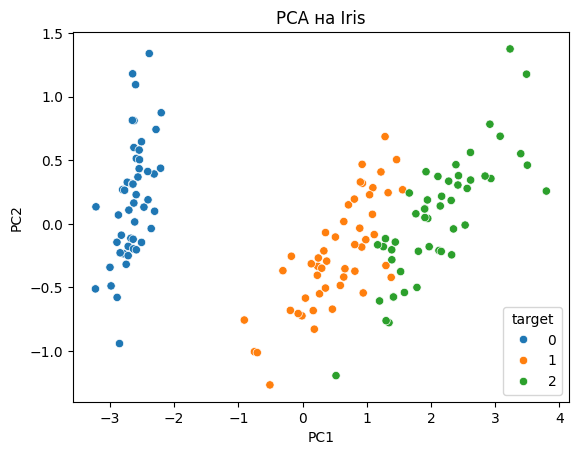

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3', 'PC4'])
df_pca['target'] = y

sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='tab10')
plt.title("PCA на Iris")
plt.show()

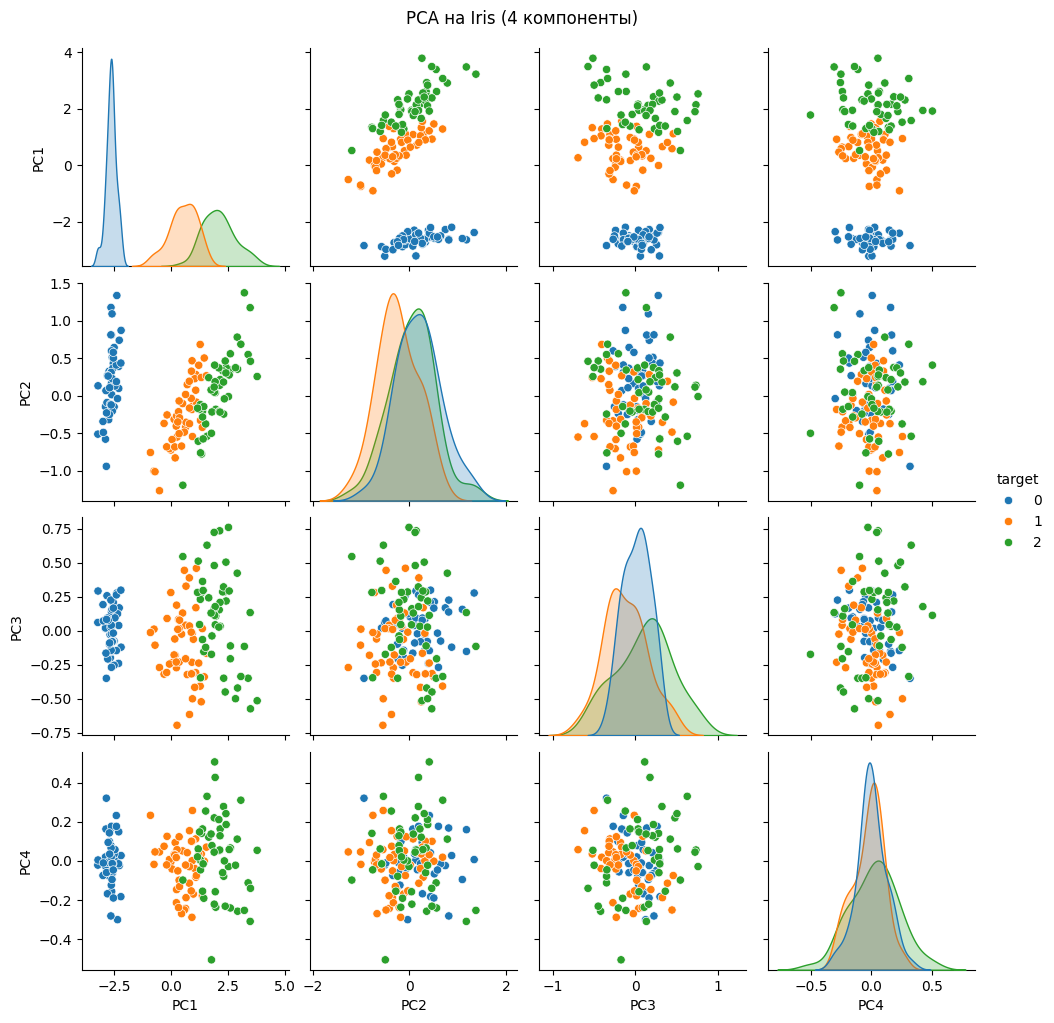

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3', 'PC4'])
df_pca['target'] = y

sns.pairplot(df_pca, vars=['PC1','PC2','PC3','PC4'], hue='target', palette='tab10')
plt.suptitle("PCA на Iris (4 компоненты)", y=1.02)
plt.show()

## Задание 3: Влияние регуляризации (Ridge Regression)
1. Разбейте данные на train/test.
2. Постройте Ridge-регрессию с разными значениями `alpha`.
3. Постройте график зависимости ошибки от `alpha`.
## Task 3: Effect of Regularization (Ridge Regression)

1. Split the data into train/test sets.
2. Train a Ridge regression model with different values of `alpha`.
3. Plot a graph showing how the error depends on `alpha`.

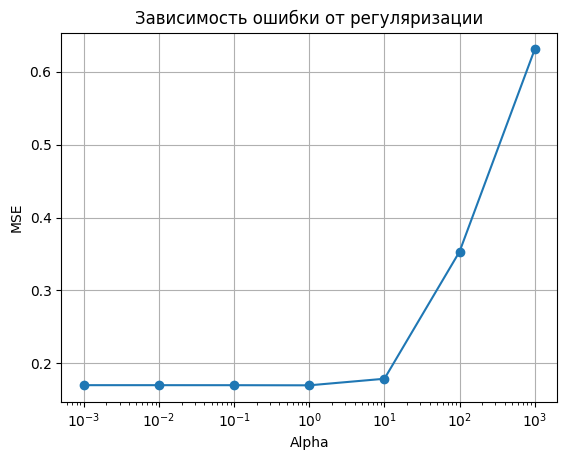

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

plt.plot(alphas, errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от регуляризации')
plt.grid(True)
plt.show()

## Задание 4 (дополнительно): PCA на MNIST
Загрузите набор данных MNIST и постройте его проекцию на 2 главные компоненты.
Сравните распределение цифр.
